In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from keras import optimizers
import datetime



In [2]:
data = pd.read_csv('air-quality(1).csv')

In [3]:
data.head(3)

,Last_Check,Current_Particulate_Matter_2_5_,PM_2_5_10_Minute_Avg_,PM_2_5_30_Minute_Avg_,PM_2_5_1_Hour_Avg_,PM_2_5_6_Hour_Avg_,PM_2_5_24_Hour_Avg_,PM_2_5_One_Week_Avg_,Temp__F_,Humidity____,Pressure__mbar_,Uptime__Seconds_,RSSI__WiFi_signal_strength_dBm_,Age_of_Data_at_Check__minutes_,ObjectId
0,2018/09/27 19:48:03+00,22.48,22.05,18.33,15.50,10.25,11.44,13.81,88,59,1002.78,3060,-84,1.0,1
1,2018/09/27 19:59:52+00,23.00,22.47,19.20,16.24,10.46,11.49,13.82,88,58,1003.02,3770,-84,0.0,2
2,2018/10/02 14:43:38+00,9.32,10.53,13.64,15.65,18.14,14.53,12.89,86,55,1011.93,7123,-92,0.0,3


In [4]:
data.tail(3)

,Last_Check,Current_Particulate_Matter_2_5_,PM_2_5_10_Minute_Avg_,PM_2_5_30_Minute_Avg_,PM_2_5_1_Hour_Avg_,PM_2_5_6_Hour_Avg_,PM_2_5_24_Hour_Avg_,PM_2_5_One_Week_Avg_,Temp__F_,Humidity____,Pressure__mbar_,Uptime__Seconds_,RSSI__WiFi_signal_strength_dBm_,Age_of_Data_at_Check__minutes_,ObjectId
12486,2019/11/06 19:02:21+00,3332.41,12.48,12.34,11.95,12.03,15.05,15.11,72,34,1015.48,77892,-83,NaN,12139
12487,2019/11/06 20:02:51+00,3333.78,12.48,12.34,11.95,12.03,15.05,15.11,72,34,1015.40,81522,-77,NaN,12140
12488,2019/11/06 20:54:27+00,3332.94,12.48,12.34,11.95,12.03,15.05,15.11,71,36,1015.21,120,-79,NaN,12141


In [5]:
data_selec = data[:11390]

In [6]:
data_selec.shape

(11390, 15)

In [7]:
train = data_selec[:8000]
rest = data_selec[8000:]
val = rest[:int(len(rest)*0.5)]
test = rest[int(len(rest)*0.5):]

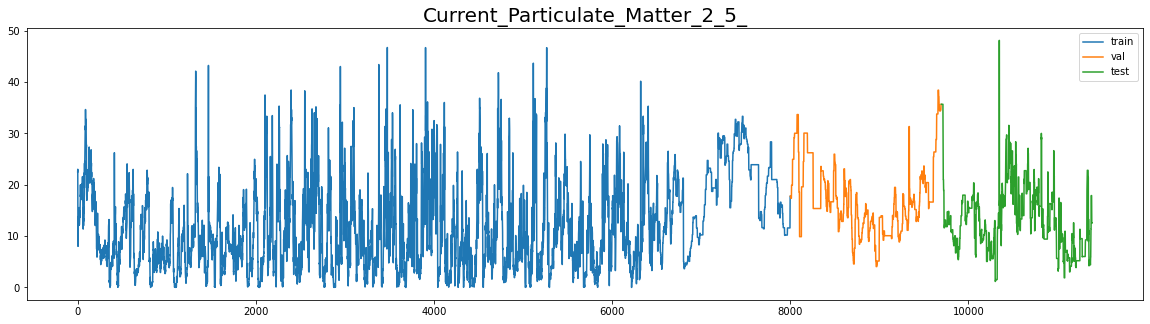

In [8]:
sns.reset_orig()
plt.figure(figsize = (20,5))
plt.title('Current_Particulate_Matter_2_5_', fontsize = 20)
plt.plot(train['Current_Particulate_Matter_2_5_'], label = 'train')
plt.plot(val['Current_Particulate_Matter_2_5_'], label = 'val')
plt.plot(test['Current_Particulate_Matter_2_5_'], label = 'test')

plt.legend(fontsize = 10)
plt.show()

In [9]:
X_train = train.drop(columns = {'Current_Particulate_Matter_2_5_', 'Last_Check','Age_of_Data_at_Check__minutes_'}, axis = 1)
y_train = train.loc[:, ['Current_Particulate_Matter_2_5_']]

X_val = val.drop(columns = {'Current_Particulate_Matter_2_5_', 'Last_Check','Age_of_Data_at_Check__minutes_'}, axis = 1)
y_val = val.loc[:, ['Current_Particulate_Matter_2_5_']]

X_test = test.drop(columns = {'Current_Particulate_Matter_2_5_', 'Last_Check','Age_of_Data_at_Check__minutes_'}, axis = 1)
y_test = test.loc[:, ['Current_Particulate_Matter_2_5_']]

In [10]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8000, 12)
(1695, 12)
(1695, 12)


In [11]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val = scaler.transform(X_val)
x_test = scaler.transform(X_test)

In [13]:
def getModel():
    model = Sequential()
    model.add(Dense(50,input_shape = (12,)))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(120))
    model.add(Activation('linear'))
    model.add(Dense(1,activation='relu'))
    model.compile(loss='mse',optimizer='adam')
    print(model.summary())
    return model

In [14]:
model = getModel()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 120)               6120      
                                                                 
 activation_2 (Activation)   (None, 120)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [15]:
model.fit(x_train,y_train,
         batch_size=64,epochs=50,
         verbose=1,validation_split=0.1,
         validation_data=(x_val,y_val),shuffle=True)

Epoch 1/50
113/113 [==============================] - 0s 1ms/step - loss: 45.1051 - val_loss: 18.2061
Epoch 2/50
113/113 [==============================] - 0s 632us/step - loss: 6.3758 - val_loss: 9.2421
Epoch 3/50
113/113 [==============================] - 0s 632us/step - loss: 4.3221 - val_loss: 8.8122
Epoch 4/50
113/113 [==============================] - 0s 683us/step - loss: 3.2415 - val_loss: 4.9913
Epoch 5/50
113/113 [==============================] - 0s 641us/step - loss: 2.5208 - val_loss: 5.4067
Epoch 6/50
113/113 [==============================] - 0s 640us/step - loss: 2.1243 - val_loss: 3.7478
Epoch 7/50
113/113 [==============================] - 0s 641us/step - loss: 1.9564 - val_loss: 4.0359
Epoch 8/50
113/113 [==============================] - 0s 631us/step - loss: 1.9083 - val_loss: 3.7239
Epoch 9/50
113/113 [==============================] - 0s 626us/step - loss: 1.8363 - val_loss: 3.7387
Epoch 10/50
113/113 [==============================] - 0s 677us/step - loss: 1.773

In [16]:
pred = model.predict(x_val)
r2 = r2_score(pred,y_val)
mse = mean_squared_error(pred,y_val)
print(r2)
print(mse)

0.7775384570884488
8.779560657906359


In [17]:
pred = model.predict(x_test)
r2=r2_score(pred,y_test)
mse = mean_squared_error(pred,y_test)
print(r2)
print(mse)

0.8147123355770279
7.267727665537712


In [18]:
#pd.DataFrame(pred).to_csv('result.csv',index = False)